In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smokedataset/smoke_detection_iot.csv


In [10]:
# Libraries
import pandas as pd
import numpy as np
# Loading data
df= pd.read_csv("../input/smokedataset/smoke_detection_iot.csv")


In [29]:
# Breif view of dataset
df.head
df.tail

<bound method NDFrame.tail of        Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0              20.000        57.36          0        400   12306        18520   
1              20.015        56.67          0        400   12345        18651   
2              20.029        55.96          0        400   12374        18764   
3              20.044        55.28          0        400   12390        18849   
4              20.059        54.69          0        400   12403        18921   
...               ...          ...        ...        ...     ...          ...   
62625          18.438        15.79        625        400   13723        20569   
62626          18.653        15.87        612        400   13731        20588   
62627          18.867        15.84        627        400   13725        20582   
62628          19.083        16.04        638        400   13712        20566   
62629          19.299        16.52        643        400   13696        20543  

In [12]:
# Counting number of na's in the dataset
df.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [13]:
# Number of row and columns
print("number of rows :",len(df))
print("number of columns :",len(df.columns))

number of rows : 62630
number of columns : 16


In [14]:
# To find outliners :
import plotly.express as px
# Ploting box plot to temperature column
fig = px.box(x=df['Temperature[C]'])
fig.show()

In [15]:
# Ploting box plot to humidity column
fig = px.box(x=df['Humidity[%]'])
fig.show()

In [16]:
# Ploting box plot to TVOC column
fig = px.box(x=df['TVOC[ppb]'])
fig.show()

In [17]:
# Ploting box plot to eCO2 column
fig = px.box(x=df['eCO2[ppm]'])
fig.show()

In [18]:
# Ploting box plot to Raw H2 column
fig = px.box(x=df['Raw H2'])
fig.show()

In [19]:
# Ploting box plot to raw ethanol column
fig = px.box(x=df['Raw Ethanol'])
fig.show()

In [20]:
# Ploting box plot to pressure column
fig = px.box(x=df['Pressure[hPa]'])
fig.show()

In [21]:
# Ploting box plot to PM1.0 column
fig = px.box(x=df['PM1.0'])
fig.show()

In [22]:
# Ploting box plot to PM2.5 column
fig = px.box(x=df['PM2.5'])
fig.show()

In [23]:
# Ploting box plot to NC0.5 column
fig = px.box(x=df['NC0.5'])
fig.show()

In [24]:
# Ploting box plot to NC1.0 column
fig = px.box(x=df['NC1.0'])
fig.show()

In [25]:
# Ploting box plot to NC2.5 column
fig = px.box(x=df['NC2.5'])
fig.show()

SO, FROM ALL THE BOX PLOTS WE SAY THAT THERE ARE MANY OUTLINERS IN MOST OF THE COLUMNS.

In [26]:
# Dropping UTC , CNT ,Unnamed  :0 columns, because
# UTC : its a timestamp
# CNT : its count(as index)
# Unnamed :0 : index
df=df.drop(["Unnamed: 0","UTC","CNT"],axis=1)
# Remaining colmuns
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [27]:
# Finding correlation :
import scipy.stats as stats
# Correlation between temperature and fire alarm
# Method-1 : it finds r-coefficient btw temperature and alarm
temp_and_alarm= stats.pointbiserialr(df["Temperature[C]"], df["Fire Alarm"])
print(temp_and_alarm.correlation)

-0.1639019096348328


                Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
Temperature[C]        1.000000    -0.243986   0.082442   0.079265 -0.135540   
Humidity[%]          -0.243986     1.000000  -0.488878  -0.369095  0.247199   
TVOC[ppb]             0.082442    -0.488878   1.000000   0.606118 -0.653053   
eCO2[ppm]             0.079265    -0.369095   0.606118   1.000000 -0.682785   
Raw H2               -0.135540     0.247199  -0.653053  -0.682785  1.000000   
Raw Ethanol          -0.037343     0.068782  -0.673715  -0.506695  0.631495   
Pressure[hPa]        -0.251203     0.694614  -0.220004  -0.326043  0.303090   
PM1.0                 0.037330    -0.236538   0.597366   0.665482 -0.530714   
PM2.5                 0.032084    -0.178882   0.477424   0.572691 -0.431079   
NC0.5                 0.039291    -0.277389   0.670657   0.699604 -0.587769   
NC1.0                 0.031608    -0.174224   0.467386   0.564252 -0.422626   
NC2.5                 0.025526    -0.118502   0.3447

<AxesSubplot:>

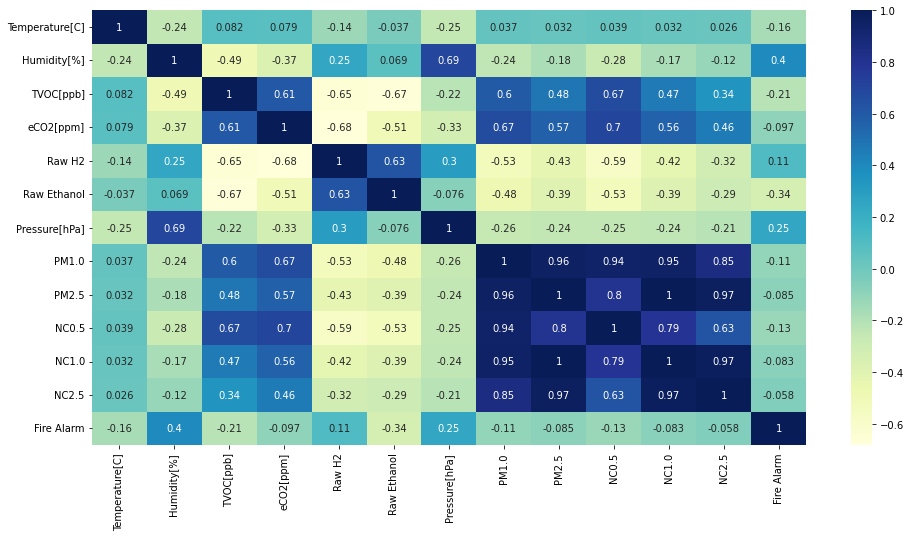

In [30]:
# Method-2 : its is heat map of r-coefficient values btw each columns
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

From the heat map we can say 
1. Pressure and Humidity have a high correlation.
2. Temperature does not has a important role in detection
3. PM's and NC's have high correlation with each other. So, we can remove few columns.
4. TVOC,PM's and NC's are principal features which can be used for classification as the difference very high.
5. Humidity and fire alarm are moderatly correlated.